
#Faceswap Deep Model Card



## Model Card Tool Kit Installaltion

In [ ]:
!pip install --upgrade pip==21.3
!pip install -q model-card-toolkit
import model_card_toolkit as mctlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Restart Execution Environment



##Import Packages and Faceswap Installation

In [ ]:
!git clone https://github.com/christiancgil/faceswap.git 
!pip install -r /content/faceswap/requirements/requirements_nvidia.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Ignoring scikit-learn: markers 'python_version >= "3.9"' don't match your environment
Ignoring pywin32: markers 'sys_platform == "win32"' don't match your environment
Ignoring numpy: markers 'python_version >= "3.8"' don't match your environment
Ignoring pynvx: markers 'sys_platform == "darwin"' don't match your environment


## Dataframes Generation

In [ ]:

#!git clone https://github.com/christiancgil/faceswap.git
!mkdir '/content/faceswap/src'
!mkdir '/content/faceswap/dst'
!mkdir '/content/faceswap/model'
!mkdir /content/faceswap/converted
!git clone https://github.com/christiancgil/DFLWorkspace.git
!ls -la
# Firts time configuration, Please select the required backend - Select 3 and Enter
# 1: AMD, 2: CPU, 3: NVIDIA, 4: APPLE SILICON: 3
!python '/content/faceswap/faceswap.py' extract -i '/content/DFLWorkspace/data_src.mp4' -o '/content/faceswap/src' -al /content/faceswap/model/alignments_src.fsa -D s3fd -A cv2-dnn -M vgg-clear -nm none -rf 0 -min 0 -l 0.4 -sz 512 -een 1 -si 0 -L INFO
!python '/content/faceswap/faceswap.py' extract -i '/content/DFLWorkspace/data_dst.mp4' -o '/content/faceswap/dst' -al /content/faceswap/model/alignments_dst.fsa -D s3fd -A cv2-dnn -M vgg-clear -nm none -rf 0 -min 0 -l 0.4 -sz 512 -een 1 -si 0 -L INFO

Cloning into 'DFLWorkspace'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 42 (delta 1), reused 7 (delta 1), pack-reused 35
Unpacking objects: 100% (42/42), done.
total 24
drwxr-xr-x  1 root root 4096 Oct 14 18:26 .
drwxr-xr-x  1 root root 4096 Oct 14 17:57 ..
drwxr-xr-x  4 root root 4096 Oct  7 13:34 .config
drwxr-xr-x  6 root root 4096 Oct 14 18:26 DFLWorkspace
drwxr-xr-x 19 root root 4096 Oct 14 18:26 faceswap
drwxr-xr-x  1 root root 4096 Oct  7 13:35 sample_data
First time configuration. Please select the required backend
1: AMD, 2: CPU, 3: NVIDIA, 4: APPLE SILICON: 3
Faceswap config written to: /content/faceswap/config/.faceswap
Setting Faceswap backend to NVIDIA
10/14/2022 18:26:32 INFO     Log level set to: INFO
10/14/2022 18:26:35 INFO     Loading Detect from S3Fd plugin...
10/14/2022 18:26:35 INFO     Downloading model: 's3fd_keras' from: https://github.com/deepfakes-models/face

In [ ]:
# Clean Data Frames, Remove multi-faces
!python '/content/faceswap/tools.py' alignments -j multi-faces -o move -a /content/faceswap/model/alignments_src.fsa -fc /content/faceswap/src -een 1 -sz 512 -m 0 -L INFO
!python '/content/faceswap/tools.py' alignments -j multi-faces -o move -a /content/faceswap/model/alignments_dst.fsa -fc /content/faceswap/dst -een 1 -sz 512 -m 0 -L INFO
!rm -r /content/faceswap/src/multi*
!rm -r /content/faceswap/dst/multi*

Setting Faceswap backend to NVIDIA
10/14/2022 18:31:38 INFO     Log level set to: INFO
10/14/2022 18:31:41 INFO     [ALIGNMENT DATA]
10/14/2022 18:31:41 INFO     Reading alignments from: '/content/faceswap/model/alignments_src.fsa'
10/14/2022 18:31:41 INFO     [FACES DATA]
10/14/2022 18:31:41 INFO     Loading file list from /content/faceswap/src
Reading Face Data: 100% 655/655 [00:00<00:00, 760.81it/s]
10/14/2022 18:31:42 INFO     [CHECK FACES]
10/14/2022 18:31:42 INFO     Moving 2 faces(s) to '/content/faceswap/src/multiple_faces_in_frame_20221014_183142'
Setting Faceswap backend to NVIDIA
10/14/2022 18:31:43 INFO     Log level set to: INFO
10/14/2022 18:31:46 INFO     [ALIGNMENT DATA]
10/14/2022 18:31:46 INFO     Reading alignments from: '/content/faceswap/model/alignments_dst.fsa'
10/14/2022 18:31:46 INFO     [FACES DATA]
10/14/2022 18:31:46 INFO     Loading file list from /content/faceswap/dst
Reading Face Data: 100% 1450/1450 [00:01<00:00, 778.77it/s]
10/14/2022 18:31:48 INFO     

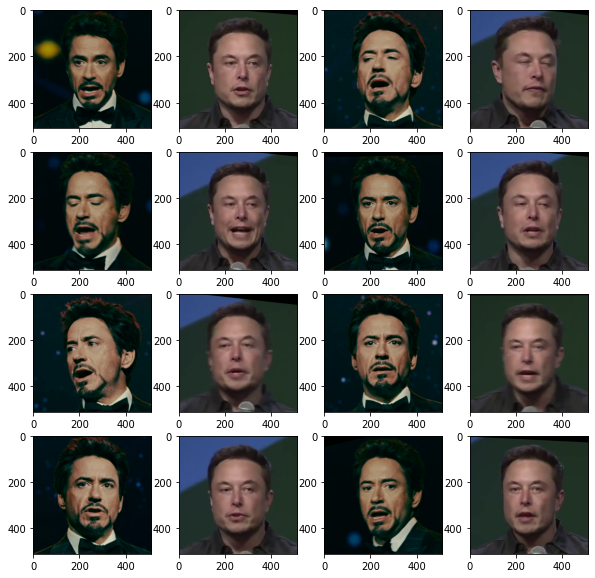

In [ ]:
def PrintTestPictures():
  import os
  import random
  from skimage import io
  import matplotlib.pyplot as plt
  import matplotlib.pyplot as plt1
  import matplotlib.image as mpimg
  import numpy as np
  images_list = []

  path_src = '/content/faceswap/src/'
  path_dst = '/content/faceswap/dst/'

  plt.figure(figsize=(10,10)) 

  for i in range(8):
    random_file_src=random.choice(os.listdir(path_src))
    random_file_dst=random.choice(os.listdir(path_dst))
    images_list.append(path_src+random_file_src)
    images_list.append(path_dst+random_file_dst)

  a=0
  for i in images_list:
    img = mpimg.imread(i)
    plt.subplot(4,4,a+1)
    a = a+1
    plt.imshow(img)

testpictures=PrintTestPictures()
 

In [ ]:
#Donwload Trained Model
!pip install --upgrade --no-cache-dir gdown
!gdown --folder https://drive.google.com/drive/folders/14cc8QjwxDHAkHPL_NVvWt7MEu7SEBjAM
!ls -la /content/DeepFake-DemoFiles

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing wheel metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14951 sha256=43e882a638ac6f37c83de845ca046ca4ca3cea8aa70d398356a713726a760a5f
  Stored in directory: /tmp/pip-ephem-wheel-cache-zg4amm88/wheels/3d/ec/b0/a96d1d126183f98570a785e6bf8789fca559853a9260e928e1
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Retrieving folder list
Processing file 1tCKnb6HQonmUamI85UQ6pK1PROugQbCr original_state.json
Processing file 1sWEju6lwptgIdp4y-tGMPiTHa_dAaHeg original.h5
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1tCKn

In [ ]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

import h5py
fn= '/content/DeepFake-DemoFiles/original.h5'
f =h5py.File(fn)
list(f.keys())
weights = f['model_weights']
print(list(f.keys()))
#savedModel=tf.keras.models.load_model('/content/DeepFake-DemoFiles/original.h5', custom_objects=None, compile=None)
#savedModel.summary()




['model_weights']


## Model Card

In [ ]:
from datetime import date
from io import BytesIO
from IPython import display
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid
import os

In [ ]:
# Inicializar el objeto 'ModelCardToolkit' el cual mantiene activos un archivo JSON de la Model Card y una plantilla de la Model Card
mct = mctlib.ModelCardToolkit()

# Al llamar a 'ModelCardToolkit.scaffold_assets()' se generan los archivos/recursos anteriores y devuelve un objeto 'ModelCard'.
model_card = mct.scaffold_assets()

In [ ]:
# Nombre del conjunto de datos
model_card.model_details.name = 'Swapface using for Deepfake'

# Descripción del modelo
model_card.model_details.overview = ('Model used for images extraction and deepfake training')

# Propietario del Model Card
model_card.model_details.owners = [
    mctlib.Owner(name= 'Model Cards IA Deepfake Faceswap', contact='christianc.gill@autonoma.edu.co')
]

# Referencias del modelo y/o conjunto de datos
model_card.model_details.references = [mctlib.Reference(reference='https://faceswap.dev/'),
                                      mctlib.Reference(reference='https://github.com/deepfakes/faceswap')
                                      ]

# Versión y fecha del Model Card
model_card.model_details.version.name = str(uuid.uuid4())
model_card.model_details.version.date = str(date.today())

# Consideraciones éticas
model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('Deepfake technology could be used for suplantation and fraude'),
    mitigation_strategy='Deepfake detection software'
    )]


# Limitaciones, uso previsto y usuarios
model_card.considerations.limitations = [mctlib.Limitation(description='Deep learnign model for deepfake')]
model_card.considerations.use_cases = [mctlib.UseCase(description='Deepfake for faces exchange ')]
model_card.considerations.users = [mctlib.User(description='Students'), mctlib.User(description='Investigadores de ML')]

mct.update_model_card(model_card)

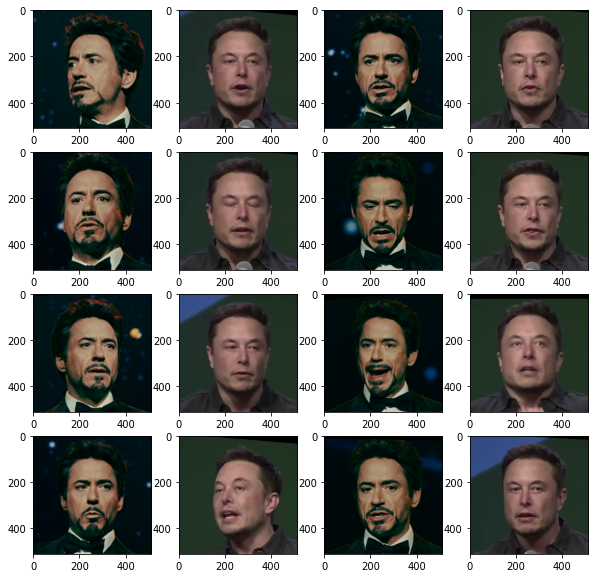

In [ ]:
# Return the model card document as an HTML page

html = mct.export_format()
display.display(display.HTML(html))
PrintTestPictures()
